In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


In [2]:
#Surinkite visus kauno dienos straipsnių pavadinimus į pandas dataframe.
#pridėkite naują stulpelį, kuriame būtų žodžių kiekis kiekviename pavadinime
#pridėkite naują stulpelį, kuriame būtų pavadinime esančių simbolių kiekis
#eksportuokite tai į CSV failą
#eksportuotą CSV failą nuskaitykite su pandas
#Koks vidutinis žodžių kiekis pavadinimuose? 
#Advanced: suraskite dažniausiai pasikartojantį žodį pavadinimuose.
#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)

article_names = pd.read_csv('kaunodiena.csv', sep=';')['article_name'].reset_index()
article_names.head()

,index,article_name
0,0,Landynė daugiabutyje: ar gali būti blogiau?
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade


In [3]:
def count_words(a): return len(a.split())
def count_symbols(a): return len(a)

article_names['word_count'] = article_names['article_name'].apply(count_words)
article_names['symbol_count'] = article_names['article_name'].apply(count_symbols)

article_names.to_csv('kauno_diena_article_names.csv', sep='|')

article_names = pd.read_csv('kauno_diena_article_names.csv', sep='|')[['article_name', 'word_count', 'symbol_count']]
article_names.head()

print(article_names['word_count'].mean())

zodziai = []
for article in article_names['article_name']:
    for zodis in article.split():
        zodziai.append(zodis)

zodziai_table = pd.DataFrame()
zodziai_table['zodis'] = zodziai
zodziai_table.groupby('zodis').value_counts().sort_values(ascending=False).reset_index().head(5)

9.211382113821138


,zodis,count
0,–,33
1,ir,17
2,į,9
3,su,7
4,„Kauno,7


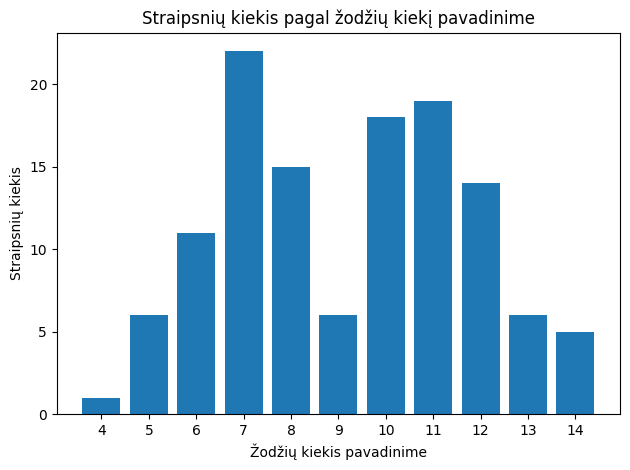

In [15]:
fig, axis = plt.subplots()
#plotting code:
bar_data = article_names['word_count'].value_counts().reset_index()
axis.bar(bar_data['word_count'], bar_data['count'])
axis.set_title('Straipsnių kiekis pagal žodžių kiekį pavadinime')
axis.set_xlabel('Žodžių kiekis pavadinime')
axis.set_ylabel('Straipsnių kiekis')
axis.set_xticks(bar_data['word_count'])
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
#kas atliko šią užduotį: turit likus į kiekvieną straipsnį konkrečiai.
# Surinkite tokią statistiką - kiek žodžių turi straipsniai?
# Koks vidutinis žodžių kiekis? Kiek yra straipsnių, kurių žodžių kiekis yra mažesnis, didesnis už vidurkį?
# Kokia žodžių kiekio mediana?

In [ ]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

In [ ]:
straipniai = pd.read_csv('kaunodienatekstai.csv', sep='|')
straipniai.head()

# def count_words(a): return len(a.split())
# article_names['word_count'] = article_names['article_name'].apply(count_words)
# print(article_names['word_count'].mean())